<a href="https://colab.research.google.com/github/IbrahemAmar/Data-mining-and-Machine-Learning-/blob/main/lab6_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Plot the model data with colored labels
def plotData(data, labels,names,col1,col2,labelsType):
    #plot the titles
    plt.title("The Iris Dataset " + labelsType +  " labels")
    plt.xlabel(names[col1])
    plt.ylabel(names[col2])
    # plot the data with different color for every label and size of 50 pixels
    myPlot = plt.scatter(data[:,col1],data[:,col2],c = labels, s=50)
    plt.legend(handles=myPlot.legend_elements()[0], labels=[1,2,3])
    plt.show()

In [ ]:
Iris = load_iris()
data = Iris.data[:, :2]
trueLabels = Iris.target
featureNames = Iris.feature_names[:2]

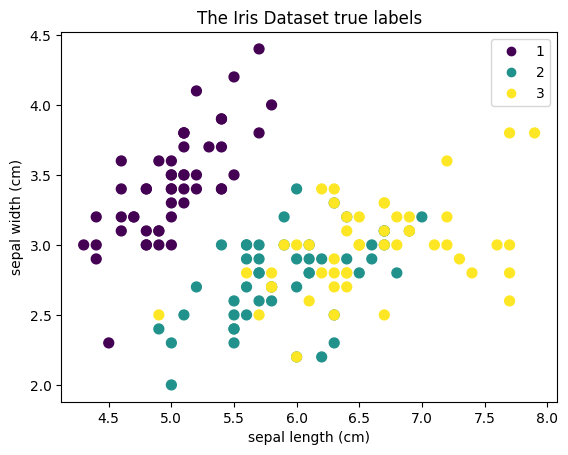

In [ ]:
plotData(data, trueLabels,featureNames,0,1,"true")

In [ ]:
trainData, testData, trainLabels, testLabels = train_test_split(
    data, trueLabels, test_size = 0.20,stratify=trueLabels)

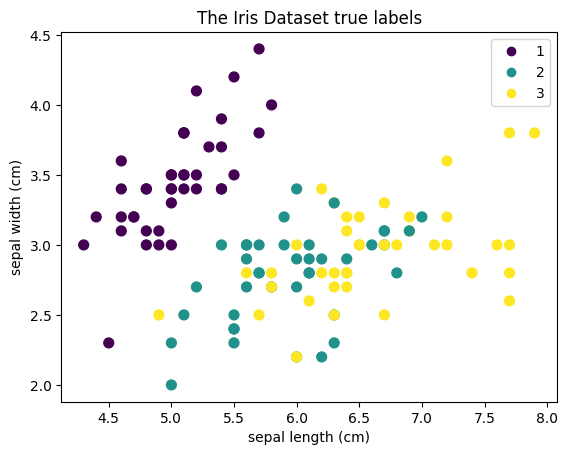

In [ ]:
plotData(trainData, trainLabels,featureNames,0,1,"true")

In [ ]:
# generate a decision tree
Dtree = tree.DecisionTreeClassifier(max_depth=3)
Dtree.fit(trainData, trainLabels)

DecisionTreeClassifier(max_depth=3)

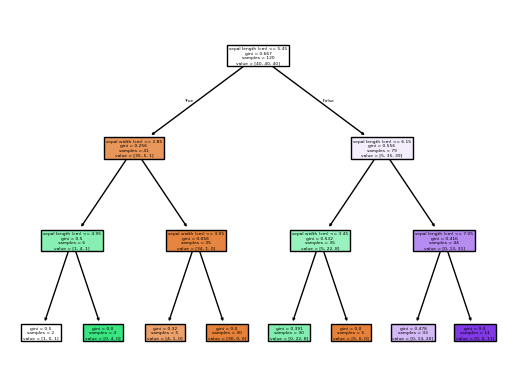

In [ ]:
tree.plot_tree(Dtree,feature_names=featureNames,filled=True)
plt.show()

In [ ]:
# show a sample prediction
index = 7
sample = testData[index,:].reshape(1,-1)
DtreePredLabel = Dtree.predict(sample)[0]
trueLabel = testLabels[index]
print("sample"+str(index)+"["+str(sample[0][0])+
      ","+str(sample[0][1]) +"] true=" + str(trueLabel) +
      " predicted ="+str(DtreePredLabel))

sample7[6.6,2.9] true=1 predicted =2


In [ ]:
featureNames

['sepal length (cm)', 'sepal width (cm)']

In [ ]:
#Index 7


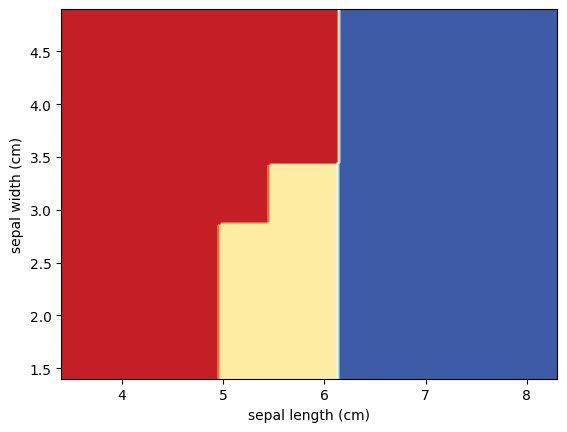

In [ ]:
# display tree boundaries
DecisionBoundaryDisplay.from_estimator(Dtree, testData,
        cmap=plt.cm.RdYlBu, response_method="predict",
        xlabel=featureNames[0],ylabel=featureNames[1])

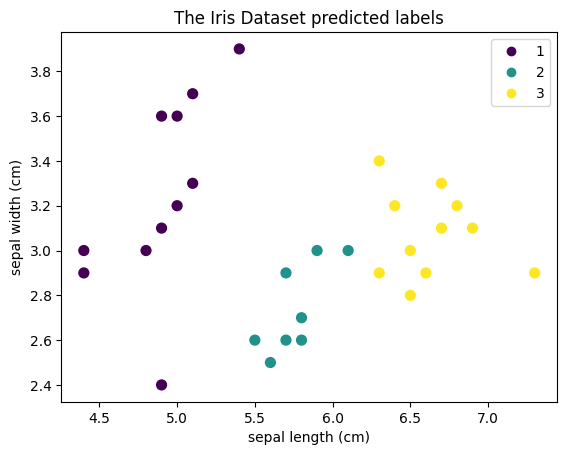

In [ ]:
# predict labels
DtreePredLabels = Dtree.predict(testData)
plotData(testData,DtreePredLabels,featureNames,0,1,"predicted")

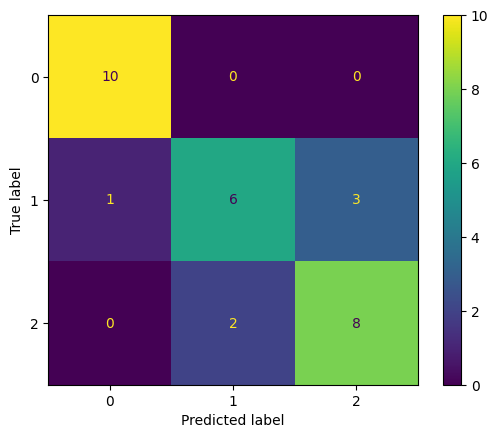

In [ ]:
# generate confusion matrix
cm = confusion_matrix(testLabels, DtreePredLabels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
Rforest = RandomForestClassifier(
    n_estimators=100,       # number of trees
    max_depth=None,        # tree depth
    random_state=None
)

Rforest.fit(trainData,trainLabels)
RforestPredLabels = Rforest.predict(testData)

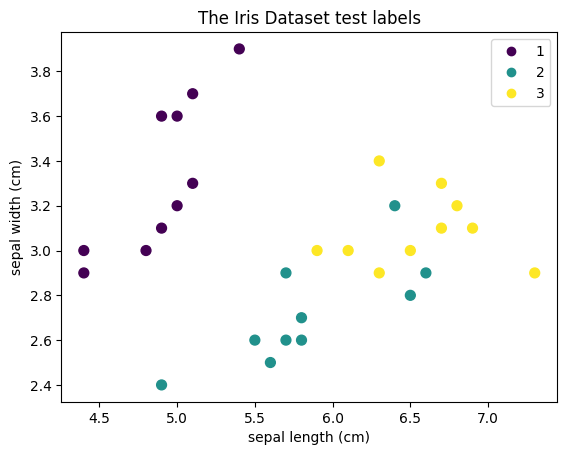

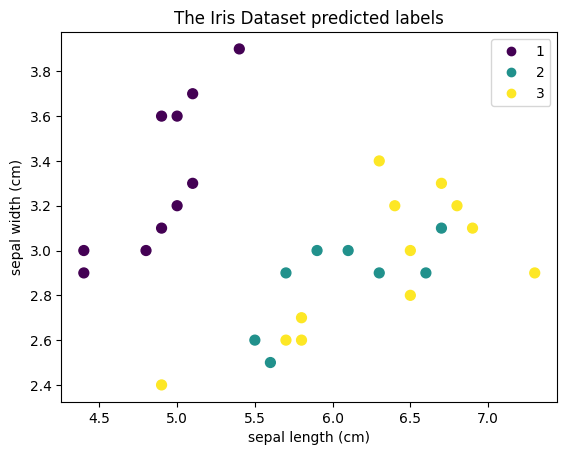

In [ ]:
# Plot the predicted results
plotData(testData,testLabels,featureNames,0,1,"test")
plotData(testData,RforestPredLabels,featureNames,0,1,"predicted")

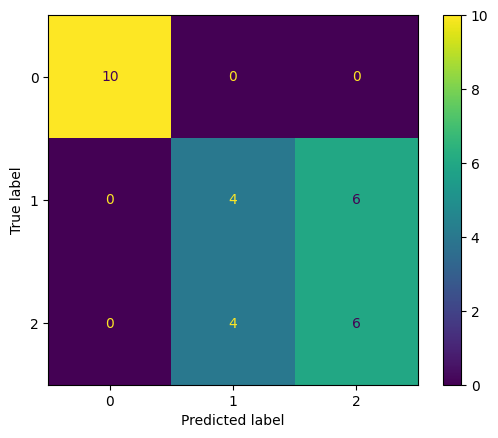

In [ ]:
# generate confusion matrix
cm = confusion_matrix(testLabels, RforestPredLabels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()